<a href="https://colab.research.google.com/github/sarahrandolphw/edu4VA/blob/jasmine's-branch/gaming_and_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code to download the dataset from kaggle to the notebook
# Need to download kaggle.json on kaggle settings, then upload in files your kaggle.json file


In [18]:
import os
import shutil

kaggle_dir = os.path.join(os.path.expanduser("~"), ".kaggle")
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
shutil.move('kaggle.json', os.path.join(kaggle_dir, 'kaggle.json'))
os.chmod(os.path.join(kaggle_dir, 'kaggle.json'), 0o600)


In [19]:
import os
import zipfile

data_link = "learnplatform-covid19-impact-on-digital-learning"
data_folder = "learning_data"

if not os.path.exists(data_folder):
    os.makedirs(data_folder)

!kaggle competitions download -c {data_link} -p {data_folder}

for file in os.listdir(data_folder):
    if file.endswith('.zip'):
        zip_path = os.path.join(data_folder, file)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_folder)
        os.remove(zip_path)
print("Dataset downloaded and extracted to", data_folder)

data_files = os.listdir(data_folder)
print("Extracted files:", data_files)


 98% 122M/124M [00:00<00:00, 274MB/s] 
100% 124M/124M [00:00<00:00, 253MB/s]
Dataset downloaded and extracted to learning_data
Extracted files: ['README.md', 'districts_info.csv', 'products_info.csv', 'merged_data.csv', 'engagement_data']


In [20]:
import pandas as pd

districts_path = os.path.join(data_folder, 'districts_info.csv')
districts_info_df = pd.read_csv(districts_path)
districts_info_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [21]:
products_path = os.path.join(data_folder, 'products_info.csv')
products_info_df = pd.read_csv(products_path)
products_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [22]:
engagements_path = os.path.join(data_folder, 'engagement_data')
for filename in os.listdir(engagements_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(engagements_path, filename)

        new_data = pd.read_csv(file_path)

        if 'lp_id' in new_data.columns:
          products_merged_df = pd.merge(products_info_df, new_data, left_on='LP ID', right_on='lp_id', how='left')

products_merged_df.drop('lp_id', axis=1, inplace=True)
products_merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45351 entries, 0 to 45350
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LP ID                       45351 non-null  int64  
 1   URL                         45351 non-null  object 
 2   Product Name                45351 non-null  object 
 3   Provider/Company Name       45350 non-null  object 
 4   Sector(s)                   43626 non-null  object 
 5   Primary Essential Function  43626 non-null  object 
 6   time                        45336 non-null  object 
 7   pct_access                  45336 non-null  float64
 8   engagement_index            31699 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 3.1+ MB


In [23]:
products_merged_df['engagement_index'].value_counts()

,count
engagement_index,
0.48,1857
0.96,954
0.63,732
1.91,569
2.39,414
...,...
309.75,1
183.56,1
224.83,1


<Axes: xlabel='time', ylabel='engagement_index'>

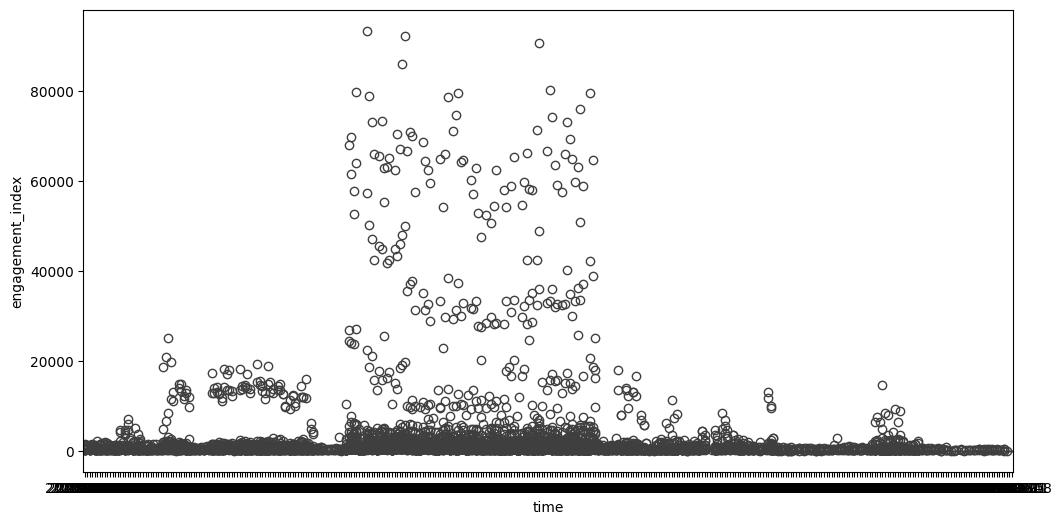

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=products_merged_df, x='time', y='engagement_index')

In [25]:
import os
import pandas as pd

# define paths
data_folder = "learning_data"
districts_path = os.path.join(data_folder, 'districts_info.csv')
products_path = os.path.join(data_folder, 'products_info.csv')
engagements_path = os.path.join(data_folder, 'engagement_data')

# load data
districts_df = pd.read_csv(districts_path)
products_df = pd.read_csv(products_path)

# ensure consistent data types for merging
districts_df['district_id'] = districts_df['district_id'].astype(str)

# process engagement data
engagement_list = []
for file in os.listdir(engagements_path):
    if file.endswith('.csv'):
        district_id = file.split('.')[0]  # extract district_id from filename
        engagement_df = pd.read_csv(os.path.join(engagements_path, file))
        engagement_df['district_id'] = district_id  # add district_id
        engagement_list.append(engagement_df)

# combine all engagement files
engagement_df = pd.concat(engagement_list, ignore_index=True)
engagement_df['district_id'] = engagement_df['district_id'].astype(str)

# merge products with engagement data
products_engagement_df = pd.merge(
    products_df,
    engagement_df,
    left_on='LP ID',
    right_on='lp_id',
    how='inner'
)

# merge districts with the combined data
final_df = pd.merge(
    districts_df,
    products_engagement_df,
    on='district_id',
    how='inner'
)

# display the final DataFrame information
print(final_df.info())
print(final_df.head())

# save to a CSV file
final_df.to_csv(os.path.join(data_folder, 'merged_data.csv'), index=False)
print("Merged data saved to 'merged_data.csv'")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11691587 entries, 0 to 11691586
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   district_id                 object 
 1   state                       object 
 2   locale                      object 
 3   pct_black/hispanic          object 
 4   pct_free/reduced            object 
 5   county_connections_ratio    object 
 6   pp_total_raw                object 
 7   LP ID                       int64  
 8   URL                         object 
 9   Product Name                object 
 10  Provider/Company Name       object 
 11  Sector(s)                   object 
 12  Primary Essential Function  object 
 13  time                        object 
 14  lp_id                       float64
 15  pct_access                  float64
 16  engagement_index            float64
dtypes: float64(3), int64(1), object(13)
memory usage: 1.5+ GB
None
  district_id     state  locale pct_bl

NEW CODE!!! Using demographic and socioeconomic data, predict which gamified tool would work best for each district.


In [26]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

# Load merged data
merged_data_path = "learning_data/merged_data.csv"
df = pd.read_csv(merged_data_path)
print("Data Loaded Successfully")


<ipython-input-26-e2fa156157d5>:14: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(merged_data_path)


Data Loaded Successfully


In [27]:
# Fill missing values
df['engagement_index'].fillna(df['engagement_index'].median(), inplace=True)
df.fillna('Unknown', inplace=True)  # Replace remaining NaNs with 'Unknown'

print("Missing Values Handled")


<ipython-input-27-bdffb68e3536>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engagement_index'].fillna(df['engagement_index'].median(), inplace=True)
<ipython-input-27-bdffb68e3536>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Unknown', inplace=True)  # Replace remaining NaNs with 'Unknown'


Missing Values Handled


In [28]:
# Encode categorical variables
categorical_cols = ['state', 'locale', 'pct_black/hispanic', 'pct_free/reduced',
                    'county_connections_ratio', 'pp_total_raw', 'Primary Essential Function']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

print("Categorical Columns Encoded")


Categorical Columns Encoded


In [29]:
# Define features and target variable
features = ['state', 'locale', 'pct_black/hispanic', 'pct_free/reduced',
            'county_connections_ratio', 'pp_total_raw']
target = 'Primary Essential Function'

X = df[features]
y = df[target]

print("Features and Target Defined")


Features and Target Defined


In [31]:
from imblearn.over_sampling import RandomOverSampler

# Balance dataset using oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(f"Data Balanced: {len(y_resampled)} samples")


Data Balanced: 81035244 samples


In [32]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print("Data Split into Training and Test Sets")


Data Split into Training and Test Sets


In [34]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    verbose=1
)

# Train the classifier
rf_classifier.fit(X_train, y_train)
print("Random Forest Model Trained")


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed: 29.3min


Random Forest Model Trained


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  3.6min


Accuracy: 0.05495801950213105


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    676196
           1       0.00      0.00      0.00    675096
           2       0.04      0.01      0.02    674799
           3       0.05      0.14      0.08    675556
           4       0.00      0.00      0.00    675357
           5       0.04      0.03      0.03    674978
           6       0.05      0.02      0.03    675422
           7       0.04      0.12      0.06    674962
           8       0.00      0.00      0.00    676001
           9       0.00      0.00      0.00    674208
          10       0.00      0.00      0.00    675200
          11       0.09      0.00      0.00    674122
          12       0.00      0.00      0.00    676969
          13       0.00      0.00      0.00    675333
          14       0.00      0.00      0.00    675706
          15       0.00      0.00      0.00    675771
          16       0.06      0.01      0.01    676640
   

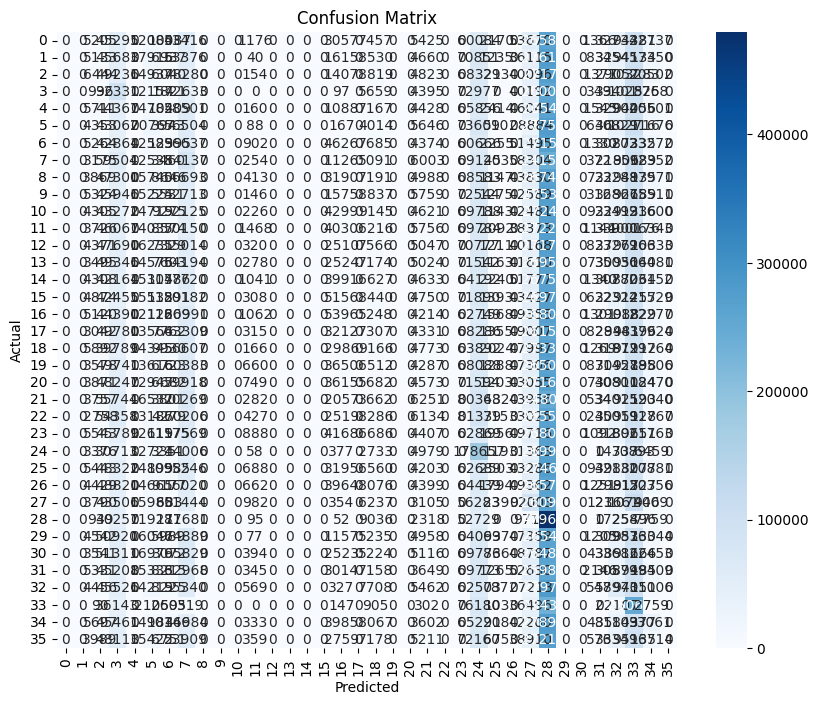

Model Evaluation Complete


In [35]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Model Evaluation Complete")


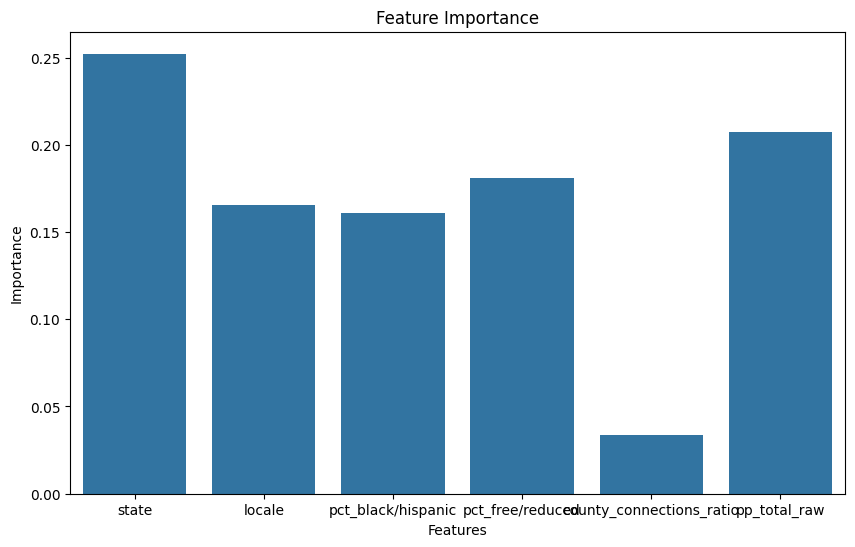

Feature Importance Analysis Complete


In [36]:
# Plot feature importance
feature_importances = rf_classifier.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_importances)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

print("Feature Importance Analysis Complete")


In [37]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate tuned model
y_pred_tuned = best_rf.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))


Fitting 3 folds for each of 81 candidates, totalling 243 fits


KeyboardInterrupt: 